# Day 19: Tractor Beam

https://adventofcode.com/2019/day/19

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from AOC2019 import Intcode, readIntcodeProg

In [3]:
prog = readIntcodeProg("input19.txt")

In [15]:
def getDigits(num):
    digits = []
    while num > 0:
        d = num%10
        num = num//10
        digits.append(d)
    return digits

def repackInstr(op):
    dig = getDigits(op)
    instr = [0,0,0,0]
    n = 0
    for i in dig:
        if (n==0): instr[0] = i
        elif (n==1): instr[0] += 10*i
        else: instr[n-1] = i
        n += 1
    return instr

class IntcodeV2():
    """Intcode computer"""

    def __init__(self, prog, name, inputs, debug=False):
        # Increase memory size to account for Day 9 programs
        self.memsize = 100000
        prog_ = np.array(prog)
        self.digits = np.zeros((self.memsize,), dtype=int)
        self.digits[:len(prog_)] = prog_
        #
        self.origprog = list(prog) # save copy of initial program in case reset is needed
        self.debug = debug
        self.name = name
        self.inputs = inputs
        self.jinp = 0
        self.ninp = len(self.inputs)
        self.relbase = 0 # need for OpInt 9
        self.ip = 0
        self.lastOutput = -1
        self.output = []
        self.isRunning = True
        self.isHalted = False
        self.step = 0

    def reset(self):
        # reset program to initial value
        prog_ = np.array(self.origprog)
        self.digits = np.zeros((self.memsize,), dtype=int)
        self.digits[:len(prog_)] = prog_
        # reset various internal variables
        self.relbase = 0
        self.ip = 0
        self.lastOutput = -1
        self.output = []
        self.isRunning = True
        self.isHalted = False
        self.step = 0
    
    def setInputs(self,inputs):
        self.inputs = inputs
        self.jinp = 0
        self.ninp = len(self.inputs)
    
    def getLastOutput(self):
        return self.lastOutput
        
    def getOutput(self):
        return self.output
    
    def runProgram(self):
        if self.isHalted:
            self.isRunning = False
            return
        self.isRunning = True
        outputDig = 0
        if (self.ip and self.isRunning and self.debug):
            print("Resuming",self.name,"operation at instruction",self.ip,"with input",inputDig)
        while ( self.ip < len(self.digits) and self.isRunning ):
            self.step +=1
            op_ = self.digits[self.ip]
            if op_ == 99:
                #print("Halting program")
                if (self.debug):
                    print(self.name,"halted - Final output =",self.output)
                self.isRunning = False
                self.isHalted = True
                break
            p = repackInstr(op_)
            op = p[0]
            if op == 3:
                if self.jinp >= self.ninp:
                    print("WARNING! Too few inputs instructions!")
                    self.isRunning = False
                    self.isHalted = True
                    break
                inputDig = self.inputs[self.jinp]
                if (self.debug):
                    print("Using input #",self.jinp," = ",inputDig)
                self.jinp += 1
                a = self.digits[self.ip+1]
                if   p[1]==0: self.digits[a] = inputDig
                elif p[1]==1: self.digits[self.digits[a]] = inputDig
                elif p[1]==2: self.digits[a+self.relbase] = inputDig
                self.ip += 2
            elif op==4:
                a = self.digits[self.ip+1]
                if   p[1]==0: outputDig = self.digits[a]
                elif p[1]==1: outputDig = a
                elif p[1]==2: outputDig = self.digits[a+self.relbase]
                self.ip += 2
                self.lastOutput = outputDig
                self.output.append(outputDig)
                if (self.debug):
                    print("Generating output =",outputDig)
                #self.isRunning = False
                #if (self.debug):
                #    print(self.name,"is waiting for new input at instruction",self.ip,"- Current output =",self.lastOutput)
            elif op==5:
                a, b = self.digits[self.ip+1:self.ip+3]
                if   p[1]==0: a_ = self.digits[a]
                elif p[1]==1: a_ = a
                elif p[1]==2: a_ = self.digits[a+self.relbase]
                if   p[2]==0: b_ = self.digits[b]
                elif p[2]==1: b_ = b
                elif p[2]==2: b_ = self.digits[b+self.relbase]
                if a_: self.ip = b_
                else: self.ip += 3
            elif op==6:
                a, b = self.digits[self.ip+1:self.ip+3]
                if   p[1]==0: a_ = self.digits[a]               
                elif p[1]==1: a_ = a
                elif p[1]==2: a_ = self.digits[a+self.relbase]
                if   p[2]==0: b_ = self.digits[b]
                elif p[2]==1: b_ = b
                elif p[2]==2: b_ = self.digits[b+self.relbase]
                if not a_: self.ip = b_
                else: self.ip += 3
            elif op==7:
                a, b, c = self.digits[self.ip+1:self.ip+4]
                if   p[1]==0: a_ = self.digits[a]
                elif p[1]==1: a_ = a
                elif p[1]==2: a_ = self.digits[a+self.relbase]
                if   p[2]==0: b_ = self.digits[b]
                elif p[2]==1: b_ = b
                elif p[2]==2: b_ = self.digits[b+self.relbase]
                if   p[3]==0: c_ = c
                elif p[3]==1: c_ = self.digits[c]
                elif p[3]==2: c_ = c+self.relbase
                if a_ < b_: self.digits[c_] = 1
                else: self.digits[c_] = 0
                self.ip += 4
            elif op==8:
                a, b, c = self.digits[self.ip+1:self.ip+4]
                if   p[1]==0: a_ = self.digits[a]
                elif p[1]==1: a_ = a
                elif p[1]==2: a_ = self.digits[a+self.relbase]    
                if   p[2]==0: b_ = self.digits[b]
                elif p[2]==1: b_ = b
                elif p[2]==2: b_ = self.digits[b+self.relbase]
                if   p[3]==0: c_ = c
                elif p[3]==1: c_ = self.digits[c]
                elif p[3]==2: c_ = c+self.relbase
                if a_ == b_: self.digits[c_] = 1
                else: self.digits[c_] = 0
                self.ip += 4
            elif op==9:
                a = self.digits[self.ip+1]
                if   p[1]==0: self.relbase += self.digits[a]
                elif p[1]==1: self.relbase += a
                elif p[1]==2: self.relbase += self.digits[a+self.relbase] # needed?
                self.ip += 2    
            elif op == 1 or op == 2: 
                a, b, c = self.digits[self.ip+1:self.ip+4]  
                if   p[1]==0: a_ = self.digits[a]
                elif p[1]==1: a_ = a
                elif p[1]==2: a_ = self.digits[a+self.relbase]    
                if   p[2]==0: b_ = self.digits[b] 
                elif p[2]==1: b_ = b   
                elif p[2]==2: b_ = self.digits[b+self.relbase]
                if   p[3]==0: c_ = c
                elif p[3]==1: c_ = self.digits[c]
                elif p[3]==2: c_ = c+self.relbase
                if op == 1: self.digits[c_] = a_ + b_
                if op == 2: self.digits[c_] = a_ * b_
                self.ip += 4
            else:
                if (self.debug):
                    print("Illegal operator:",op)
                self.isRunning = False
                return self.isRunning
        return self.isRunning

In [18]:
nx = 50
ny = 50
beam = np.zeros((ny,nx))

d = IntcodeV2(prog,"DRONE",[0,0])

print("Scanning surrounding space... ",end="")
for x in range(nx):
    for y in range(ny):
        d.reset()
        d.setInputs([x,y]) 
        d.runProgram()
        beam[y][x] = d.getLastOutput()
print("Done!")

Scanning surrounding space... Done!


Number of points affected by the tractor beam = 173


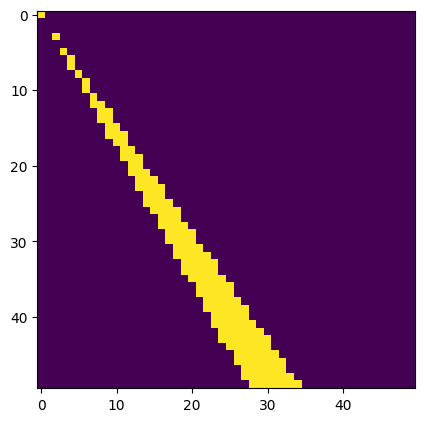

In [21]:
fig = plt.figure(figsize=(5, 5), dpi=100)
plt.imshow(beam)
print("Number of points affected by the tractor beam =",int(beam[beam==1].sum()))